<a href="https://colab.research.google.com/github/kittisaktaoma/GO-tools-comparsion/blob/master/GO_tools_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
library(ggplot2)
library(data.table)
library(xlsx)
library(factoextra)
library(dplyr)
library(data.table)
library(corrplot)
library(RColorBrewer)
library(Hmisc)
library(ggrepel)
library(ComplexHeatmap)
#library(moments)
library(devtools)
library(dplyr)
library(ggpubr)
library(reshape2)



In [53]:
# Make plots wider 
options(repr.plot.width=12, repr.plot.height=8)

#Retreive Enriched Data from Github

In [57]:
df <- fread("https://raw.githubusercontent.com/kittisaktaoma/GO-tools-comparsion/master/res/Enrichment_01.txt")
head(df)

GOID,Description,FDR,Database,Type,Genes,Enrichment,Group
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
GO:0007010,cytoskeleton organization,0.894,DAVID,BP,TUBAL3,All (Up vs. Down),EGCG
GO:0007010,cytoskeleton organization,0.894,DAVID,BP,ACTL6B,All (Up vs. Down),EGCG
GO:0007010,cytoskeleton organization,0.894,DAVID,BP,TUBB6,All (Up vs. Down),EGCG
GO:0090090,negative regulation of canonical Wnt signaling pathway,0.885,DAVID,BP,CAV1,All (Up vs. Down),EGCG
GO:0090090,negative regulation of canonical Wnt signaling pathway,0.885,DAVID,BP,PSMC4,All (Up vs. Down),EGCG
GO:0090090,negative regulation of canonical Wnt signaling pathway,0.885,DAVID,BP,PSMA5,All (Up vs. Down),EGCG


In [58]:
df_01 <- df %>% filter(.,Enrichment == "All (Up vs. Down)")
head(df_01)

GOID,Description,FDR,Database,Type,Genes,Enrichment,Group
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
GO:0007010,cytoskeleton organization,0.894,DAVID,BP,TUBAL3,All (Up vs. Down),EGCG
GO:0007010,cytoskeleton organization,0.894,DAVID,BP,ACTL6B,All (Up vs. Down),EGCG
GO:0007010,cytoskeleton organization,0.894,DAVID,BP,TUBB6,All (Up vs. Down),EGCG
GO:0090090,negative regulation of canonical Wnt signaling pathway,0.885,DAVID,BP,CAV1,All (Up vs. Down),EGCG
GO:0090090,negative regulation of canonical Wnt signaling pathway,0.885,DAVID,BP,PSMC4,All (Up vs. Down),EGCG
GO:0090090,negative regulation of canonical Wnt signaling pathway,0.885,DAVID,BP,PSMA5,All (Up vs. Down),EGCG


#Plot Frequency (Sig and Non. Sig)

`summarise()` regrouping output by 'Database', 'Group', 'Type' (override with `.groups` argument)



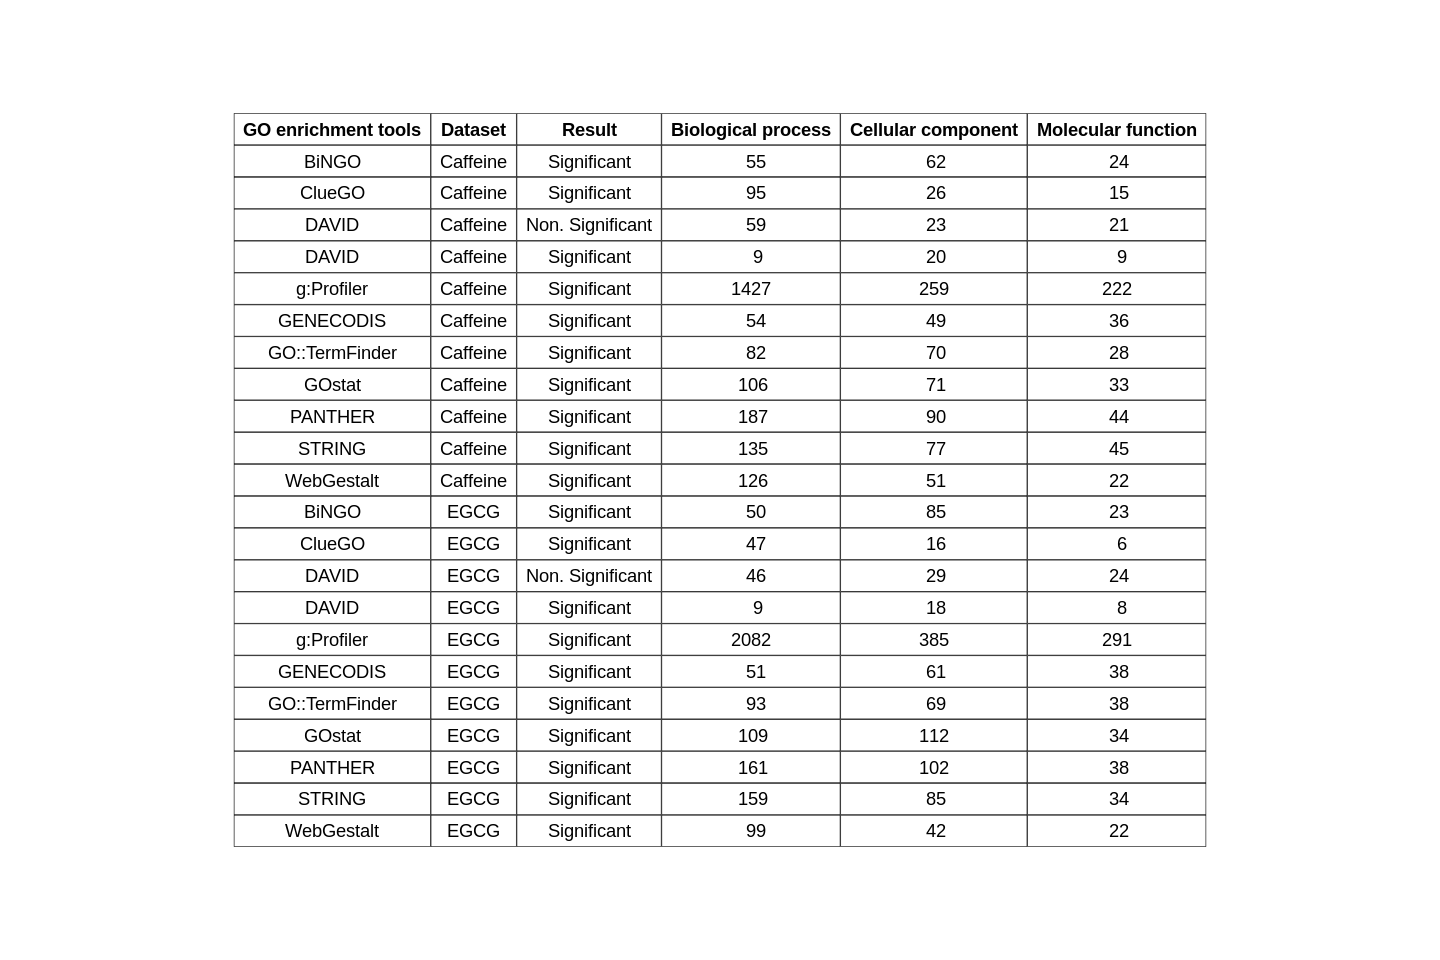

In [59]:
# Plot Frequency
df_01$Condition <- ifelse(df_01$FDR < 0.05,"Significant","Non. Significant")

##Count and Plot

##Count
count <- df_01[,-6] %>% unique() %>% group_by(Database,Group,Type,Condition) %>% dplyr::summarise(count=n()) %>% as.data.frame()
resh <- reshape(count, idvar = c("Database","Group","Condition"), timevar = "Type", direction = "wide")
resh.01 <-resh[order(resh$Group),]
names(resh.01) <- c("GO enrichment tools",
                    "Dataset",
                    "Result",
                    "Biological process",
                    "Cellular component",
                    "Molecular function")

ggtexttable(resh.01, rows = NULL, theme = ttheme("classic"))


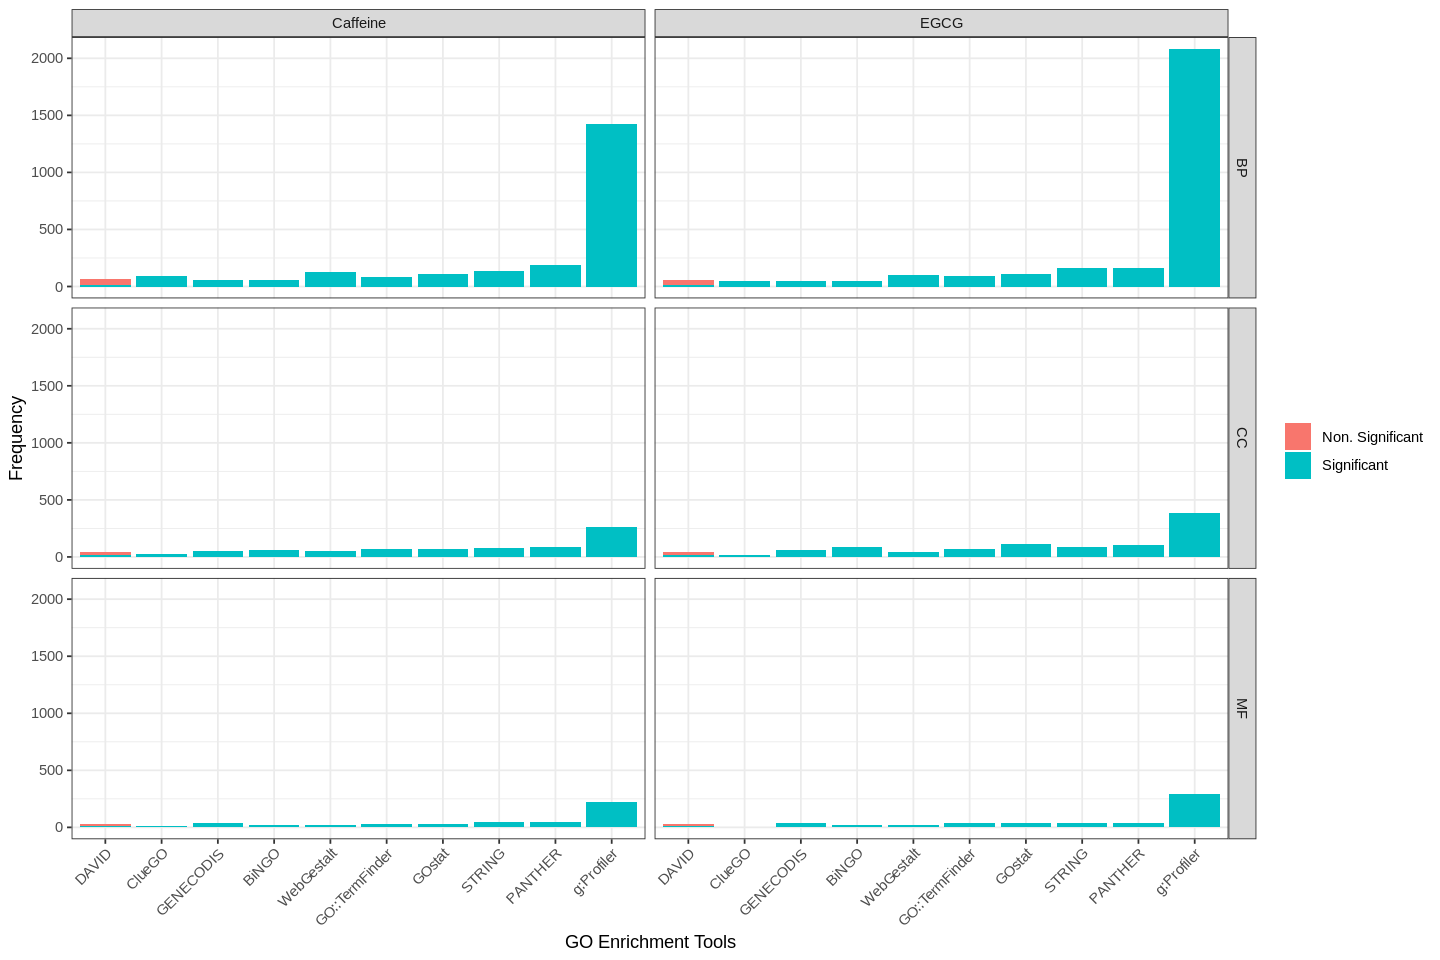

In [60]:
##Plot
ggplot(data=count, aes(x=reorder(Database,count), y=count, fill=Condition)) +
  geom_bar(stat="identity") +
  theme_bw() +
  facet_grid(vars(Type), vars(Group)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(fill = "") +
  xlab("GO Enrichment Tools") +
  ylab("Frequency")


#Plot Frequency of BP, MF, CC between Caffeine and EGCG (Sig. Only)

In [61]:
round_df <- function(df, digits, rf="round") {
  
  if(  missing(df) ){  
    stop("df not set", call. = F) 
  }else if(!is.data.frame(df)){
    stop("df must be a dataframe", call.=F)
  }
  
  if(missing(digits)){
    digits <- 0
  }else if(!is.numeric( digits )){
    stop( "'digits' must be numeric", call.=F)
  }else if(length(digits)!=1){
    stop("length of 'digits' must be 1", call.=F)
  }else if(! digits > -10 | ! digits <= 10){
    stop("'digits' must be a number between -10 and 10", call.=F)
  }
  
  if(!is.character( rf )){
    stop( "'rf' must be character", call.=F)
  }else if(length(rf)!=1){
    stop("Length of 'rf' must be 1", call.=F)
  }else if(! rf %in% c('round', 'ceiling', 'floor', 'trunc', 'signif') ){ 
  stop("'rf' must be equal to 'round', 'ceiling', 'trunc', 'floor' or 'signif' ", call. = F) 
  }
  
  numeric_columns <- sapply(df, class) == 'numeric'
  
  if(rf=="round"){
  
  df[numeric_columns] <-  round(df[numeric_columns], digits)
  
  }else if(rf=="ceiling"){
    
    df[numeric_columns] <-  ceiling(df[numeric_columns])
    
  }else if(rf=="floor"){
    
    df[numeric_columns] <-  floor(df[numeric_columns])
    
  }else if(rf=="trunc"){
    
    df[numeric_columns] <-  ceiling(df[numeric_columns])
    
  }else if(rf=="signif"){
    
    df[numeric_columns] <-  signif(df[numeric_columns], digits)
    
  }
  
  df
}

`summarise()` regrouping output by 'Database', 'Group' (override with `.groups` argument)



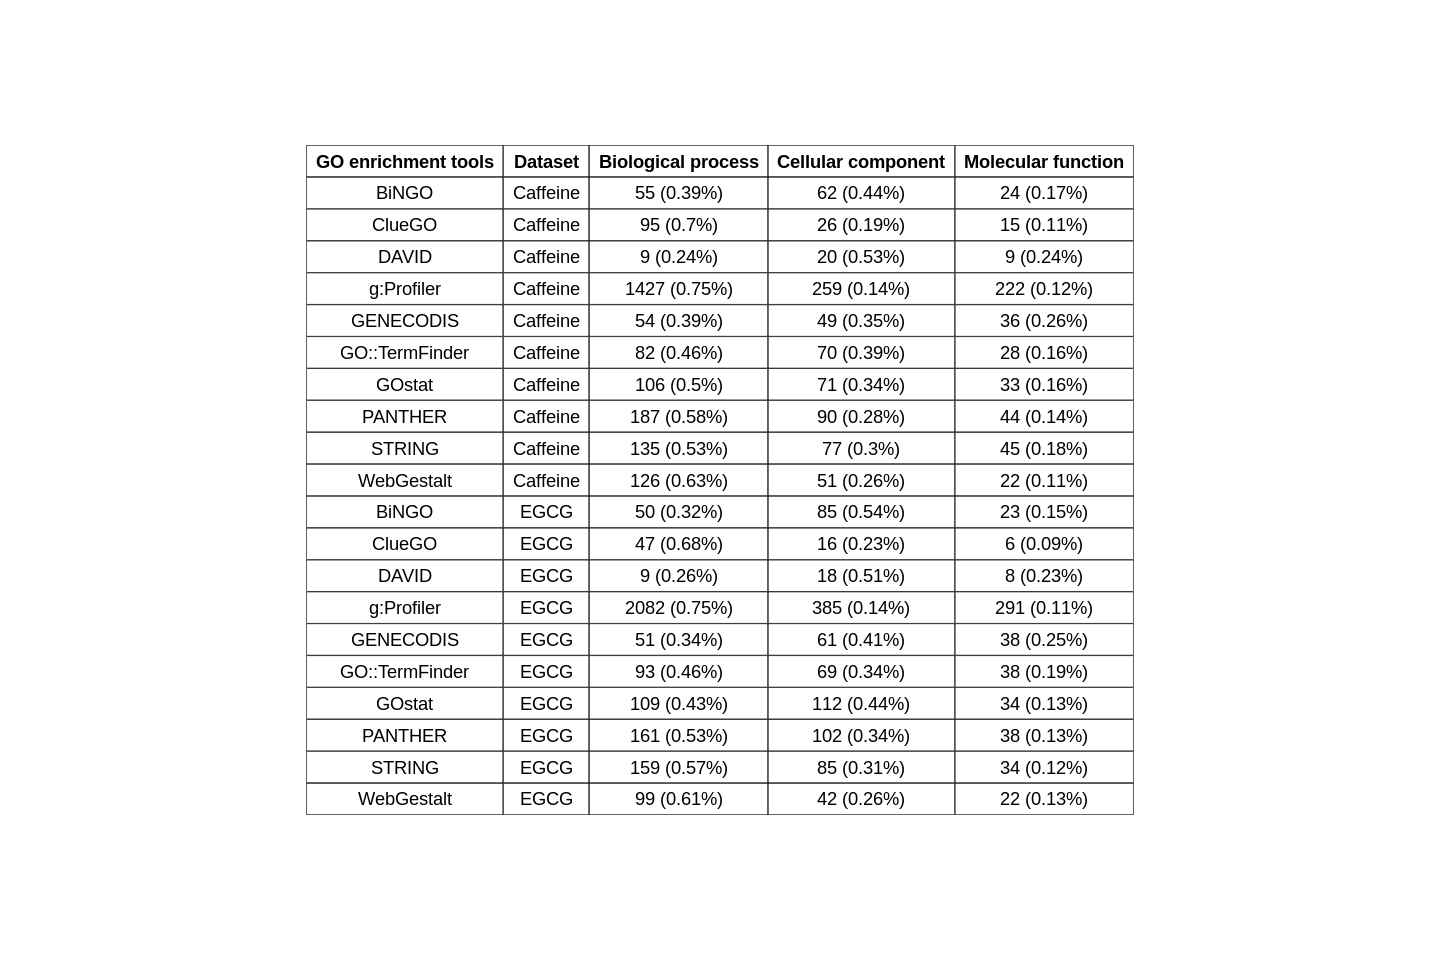

In [62]:
count_02 <-df_01[,-6] %>% unique() %>% filter(.,Condition == "Significant") %>% group_by(Database,Group,Type) %>% dplyr::summarise(count=n()) %>% as.data.frame() 
resh <- reshape(count_02, idvar = c("Database","Group"), timevar = "Type", direction = "wide")
resh.01 <-resh[order(resh$Group),]
names(resh.01) <- c("GO enrichment tools",
                    "Dataset",
                    "Biological process",
                    "Cellular component",
                    "Molecular function")

resh.02 <- cbind(resh.01[,c(1,2)], prop.table(as.matrix(resh.01[,-c(1,2)]), margin = 1))
resh.02[,c(3:5)] <- round_df(resh.02[,c(3:5)], digits=2)

all_non <- cbind(resh.01,resh.02)[,-c(6,7)] 
all_non$`Biological process` <- paste0(all_non$`Biological process`," ","(",all_non$`Biological process.1`,"%",")")
all_non$`Cellular component` <- paste0(all_non$`Cellular component`," ","(",all_non$`Cellular component.1`,"%",")")
all_non$`Molecular function` <- paste0(all_non$`Molecular function`," ","(",all_non$`Molecular function.1`,"%",")")

all_non.final <- all_non[,-c(6,7,8)]
#reshape(all_non.final, idvar = "GO enrichment tools", timevar = "Dataset", direction = "wide")
ggtexttable(all_non.final, rows = NULL, theme = ttheme("classic"))


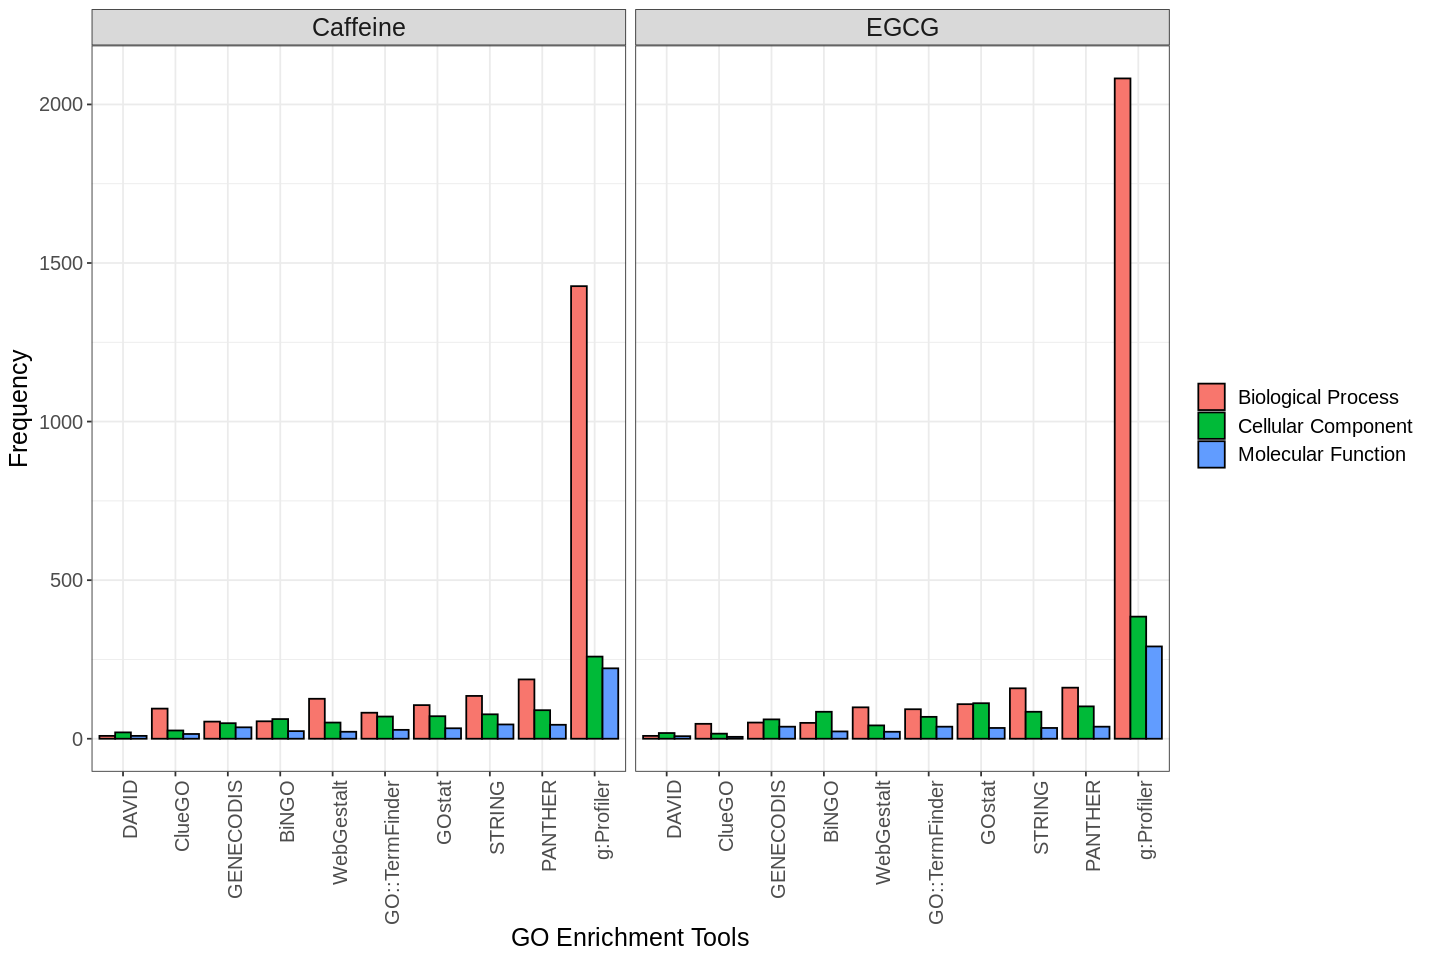

In [63]:

ggplot(data=count_02, aes(x=reorder(Database,count), y=count, fill=Type)) +
  geom_bar(stat="identity", color="black", position=position_dodge()) +
  theme_bw() +
  facet_grid(cols=vars(Group)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(fill = "")+
  xlab("GO Enrichment Tools") +
  ylab("Frequency")+ 
  theme(strip.text.x = element_text(size = 15))+
  theme(text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1)) +
  scale_fill_discrete(name = "", labels = c("Biological Process",
                                                "Cellular Component",
                                                "Molecular Function"))

#GO proportion

In [65]:
chi <- df_01[,-6] %>% unique() %>% filter(.,FDR < 0.05) %>% select(Database,Type,Group)  
chi_02 <- table(chi$Database,chi$Type,chi$Group) %>% as.data.frame()
chi_03 <- reshape(chi_02, idvar = c("Var1","Var3"), timevar = "Var2", direction = "wide") 
names(chi_03) <- c("Database","Dataset","BP","CC","MF")
chi_4 <- cbind(chi_03[,c(1,2)], prop.table(as.matrix(chi_03[,-c(1,2)]), margin = 1)) %>% melt(.)
head(chi_4)

Warning message in melt(.):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error.”
Using Database, Dataset as id variables



,Database,Dataset,variable,value
,<fct>,<fct>,<fct>,<dbl>
1,BiNGO,Caffeine,BP,0.3900709
2,ClueGO,Caffeine,BP,0.6985294
3,DAVID,Caffeine,BP,0.2368421
4,g:Profiler,Caffeine,BP,0.7479036
5,GENECODIS,Caffeine,BP,0.3884892
6,GO::TermFinder,Caffeine,BP,0.4555556


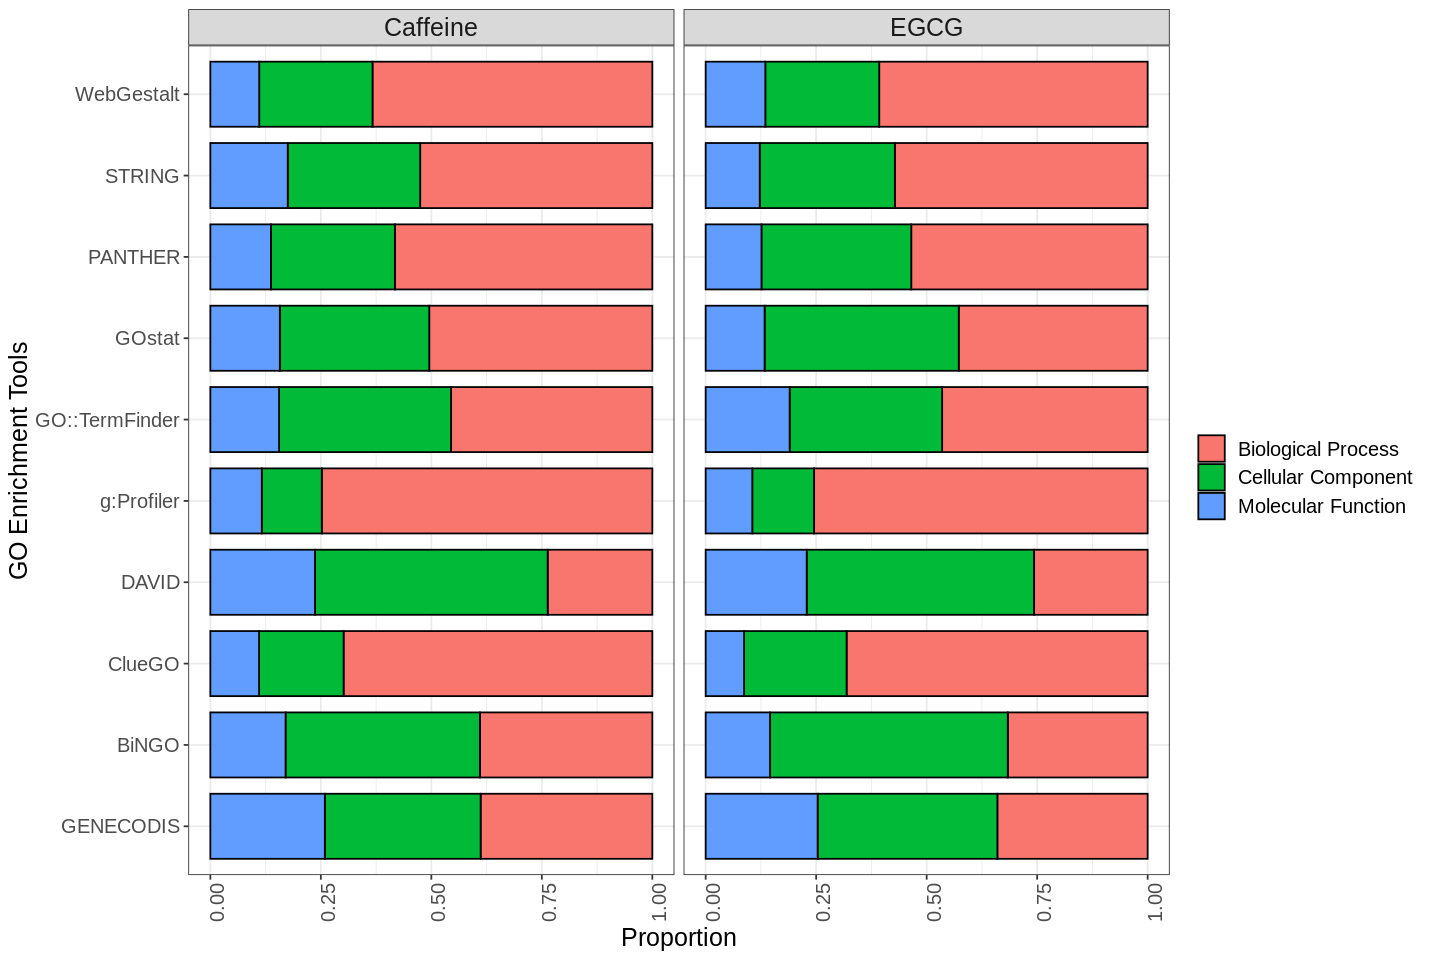

In [66]:
ggplot(data=chi_4, aes(x=reorder(Database,-value), y=value, fill=variable)) +
  geom_bar(stat="identity",color = "black",width=0.8) +
  theme_bw() + ylab("Proportion") + xlab("GO Enrichment Tools")  + guides(fill=guide_legend(title="")) + 
  coord_flip()+
  facet_grid(. ~ Dataset) + 
  theme(strip.text.x = element_text(size = 15))+
  theme(text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1)) +
  scale_fill_discrete(name = "", labels = c("Biological Process",
                                            "Cellular Component",
                                            "Molecular Function"))

## Chi-square Test

### Test between and within group

In [ ]:
# Chitest between
for (i in unique(chi_03$Database) %>% unlist()) {
  print(i)
  chi_05 <- chi_03 %>% filter(.,Database == i) %>% select(-Dataset)
  chi_06 <- chi_05[,-c(1)]
  x <- chisq.test(chi_06)  
  print(x$p.value)
}


In [ ]:
# Chitest within
for (i in unique(chi_03$Dataset) %>% unlist()) {
  print(i)
  chi_05 <- chi_03 %>% filter(.,Dataset == i) %>% select(-Database)
  chi_06 <- chi_05[,-c(1)]
  x <- chisq.test(chi_06)  
  print(x$statistic)
  print(x$p.value)}



In [72]:
#pairwise (Within Group)
for (i in unique(chi_03$Dataset) %>% unlist()) {
  print(i)
  chi_05 <- chi_03 %>% filter(.,Dataset == i) %>% select(-Dataset)
  chi_06 <- chi_05[,-c(1)]
  x <- chisq.test(chi_06)  
  print(x$statistic)
  print(x$p.value)}


[1] "Caffeine"
X-squared 
 296.1834 
[1] 2.932644e-52
[1] "EGCG"


Warning message in chisq.test(chi_06):
“Chi-squared approximation may be incorrect”


X-squared 
 468.8059 
[1] 3.709202e-88


### Heatmap For Pairwise Comparison

#### EGCG dataset

In [114]:
library(reshape2)
x.01 <- chi_03 %>% filter(.,Dataset != "Caffeine Dataset") %>% select(-Dataset)
x.02 <- t(x.01[,-1]) %>% as.data.frame
df_name <- x.01[1] %>% unlist()
names(x.02) <- df_name

In [ ]:
# initialization
out_list <- list()
column <- 1
# cycle for storing kappa2's output structure
for (i in 1:(ncol(x.02)-1)){
  for (j in (i+1):ncol(x.02)){
    x <- chisq.test(x.02[,c(i,j)])
    out_list[[column]] <- x$p.value
    # renaming the elements
    names(out_list)[column] <- paste0(colnames(x.02[i]), "_", colnames(x.02[j]))
    column <- column + 1
  }
}

res.eg <- do.call(rbind,out_list) %>% as.data.frame()
res.eg$data <- rownames(res.eg)
res.eg.1 <- splitstackshape::cSplit(res.eg, "data", "_")
res.eg.1$type <- "EGCG Dataset"



#### Caffeine dataset

In [ ]:
x.01 <- chi_03 %>% filter(.,Dataset != "EGCG Dataset") %>% select(-Dataset)
x.02 <- t(x.01[,-1]) %>% as.data.frame
df_name <- x.01[1] %>% unlist()
names(x.02) <- df_name

In [ ]:
# initialization
out_list <- list()
column <- 1
# cycle for storing kappa2's output structure
for (i in 1:(ncol(x.02)-1)){
  for (j in (i+1):ncol(x.02)){
    x <- chisq.test(x.02[,c(i,j)])
    out_list[[column]] <- x$p.value
    # renaming the elements
    names(out_list)[column] <- paste0(colnames(x.02[i]), "_", colnames(x.02[j]))
    column <- column + 1
  }
}

res.caf <- do.call(rbind,out_list) %>% as.data.frame()
res.caf$data <- rownames(res.caf)
res.caf.1 <- splitstackshape::cSplit(res.caf, "data", "_")
res.caf.1$type <- "Caffeine Dataset"


In [ ]:
res.all <- rbind(res.caf.1,res.eg.1)
res.all$sig <- ifelse(res.all$V1 < 0.001,"***",
                      ifelse(res.all$V1 < 0.01,"**",
                             ifelse(res.all$V1 < 0.05,"*","ns")))

res.all

In [ ]:
ggplot(data = res.all, aes(x = data_1, y = data_2)) +
  geom_tile(aes(fill=V1))+
  facet_grid(cols=vars(type)) + 
  theme_pubr() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  geom_text(aes(label=sig,color="white"),cex=5)+
  theme(legend.position="none") +
  scale_fill_distiller(palette = "Reds") +
  xlab("") +
  ylab("") + 
  theme(strip.text.x = element_text(size = 15)) 

#Compare the number of Gene in GO terms

In [ ]:
all <- df_01 %>% filter(.,FDR<0.05)
head(all)

##EGCG

In [ ]:
gene_duplicate <- all %>% filter(Dataset == "EGCG") %>%  
  dplyr::select(GOID,Database,Dataset) %>% unique()
gene_duplicate

#dup = 486
gene_duplicate.list <- table(gene_duplicate$GOID) %>% as.data.frame() %>% filter(.,Freq > 1) %>% dplyr::select(Var1) %>% unlist() 

# dup.01 = 359
Tgene_min <- all %>% filter(.,Condition == "Significant") %>% filter(.,Dataset == "EGCG") %>% 
  filter(.,GOID %in% gene_duplicate.list) %>% 
  group_by(GOID,Type,Database,Dataset) %>% dplyr::summarise(count=n()) %>% group_by(GOID)%>%
  dplyr::slice(which.min(count)) 

# dup.01 = 359
Tgene_max <- all %>% filter(.,Condition == "Significant") %>% filter(.,Dataset == "EGCG") %>% 
  filter(.,GOID %in% gene_duplicate.list) %>% 
  group_by(GOID,Type,Database,Dataset) %>% dplyr::summarise(count=n()) %>% group_by(GOID)%>%
  dplyr::slice(which.max(count)) 


# equal = 127
Tgene_equal <- Tgene_max$count - Tgene_min$count %>% as.data.frame()
Tgene_equal$GOID <- Tgene_max$GOID
names(Tgene_equal) <- c("range","GOID")
equal_gene <- Tgene_equal %>% filter(.,range == 0) %>% select(GOID) %>% unlist()


# dup.01 = 359
Tgene_min <- all %>% filter(.,Condition == "Significant") %>% filter(.,Dataset == "EGCG") %>% 
  filter(.,GOID %in% gene_duplicate.list) %>% 
  group_by(GOID,Type,Database,Dataset) %>% dplyr::summarise(count=n()) %>% group_by(GOID)%>%
  dplyr::slice(which.min(count)) %>% as.data.frame() %>% filter(.,!GOID %in% equal_gene)  

 dup.01 = 359
Tgene_max <- all %>% filter(.,Condition == "Significant") %>% filter(.,Dataset == "EGCG") %>% 
  filter(.,GOID %in% gene_duplicate.list) %>% 
  group_by(GOID,Type,Database,Dataset) %>% dplyr::summarise(count=n()) %>% group_by(GOID)%>%
  dplyr::slice(which.max(count)) %>% as.data.frame() %>% filter(.,!GOID %in% equal_gene)



count.max <- table(Tgene_max$Database,Tgene_max$Dataset,Tgene_max$Type) %>% as.data.frame()
count.max$con <- "Maximum"
count.min <- table(Tgene_min$Database,Tgene_min$Dataset,Tgene_min$Type) %>% as.data.frame()
count.min$con <- "Minimum" 

min_max.EGCG <- rbind(count.max,count.min)


##Caffeine

In [ ]:
gene_duplicate <- all %>% filter(Dataset == "Caffeine") %>%  
  dplyr::select(GOID,Database,Dataset) %>% unique()
gene_duplicate

#dup = 486
gene_duplicate.list <- table(gene_duplicate$GOID) %>% as.data.frame() %>% filter(.,Freq > 1) %>% dplyr::select(Var1) %>% unlist() 

# dup.01 = 359
Tgene_min <- all %>% filter(.,Condition == "Significant") %>% filter(.,Dataset == "Caffeine") %>% 
  filter(.,GOID %in% gene_duplicate.list) %>% 
  group_by(GOID,Type,Database,Dataset) %>% dplyr::summarise(count=n()) %>% group_by(GOID)%>%
  dplyr::slice(which.min(count)) 

# dup.01 = 359
Tgene_max <- all %>% filter(.,Condition == "Significant") %>% filter(.,Dataset == "Caffeine") %>% 
  filter(.,GOID %in% gene_duplicate.list) %>% 
  group_by(GOID,Type,Database,Dataset) %>% dplyr::summarise(count=n()) %>% group_by(GOID)%>%
  dplyr::slice(which.max(count)) 


# equal = 127
Tgene_equal <- Tgene_max$count - Tgene_min$count %>% as.data.frame()
Tgene_equal$GOID <- Tgene_max$GOID
names(Tgene_equal) <- c("range","GOID")
equal_gene <- Tgene_equal %>% filter(.,range == 0) %>% select(GOID) %>% unlist()


# dup.01 = 359
Tgene_min <- all %>% filter(.,Condition == "Significant") %>% filter(.,Dataset == "Caffeine") %>% 
  filter(.,GOID %in% gene_duplicate.list) %>% 
  group_by(GOID,Type,Database,Dataset) %>% dplyr::summarise(count=n()) %>% group_by(GOID)%>%
  dplyr::slice(which.min(count)) %>% as.data.frame() %>% filter(.,!GOID %in% equal_gene)  

 dup.01 = 359
Tgene_max <- all %>% filter(.,Condition == "Significant") %>% filter(.,Dataset == "Caffeine") %>% 
  filter(.,GOID %in% gene_duplicate.list) %>% 
  group_by(GOID,Type,Database,Dataset) %>% dplyr::summarise(count=n()) %>% group_by(GOID)%>%
  dplyr::slice(which.max(count)) %>% as.data.frame() %>% filter(.,!GOID %in% equal_gene)



count.max <- table(Tgene_max$Database,Tgene_max$Dataset,Tgene_max$Type) %>% as.data.frame()
count.max$con <- "Maximum"
count.min <- table(Tgene_min$Database,Tgene_min$Dataset,Tgene_min$Type) %>% as.data.frame()
count.min$con <- "Minimum" 

min_max.Caffeine <- rbind(count.max,count.min)


## Combine dataframe and plot

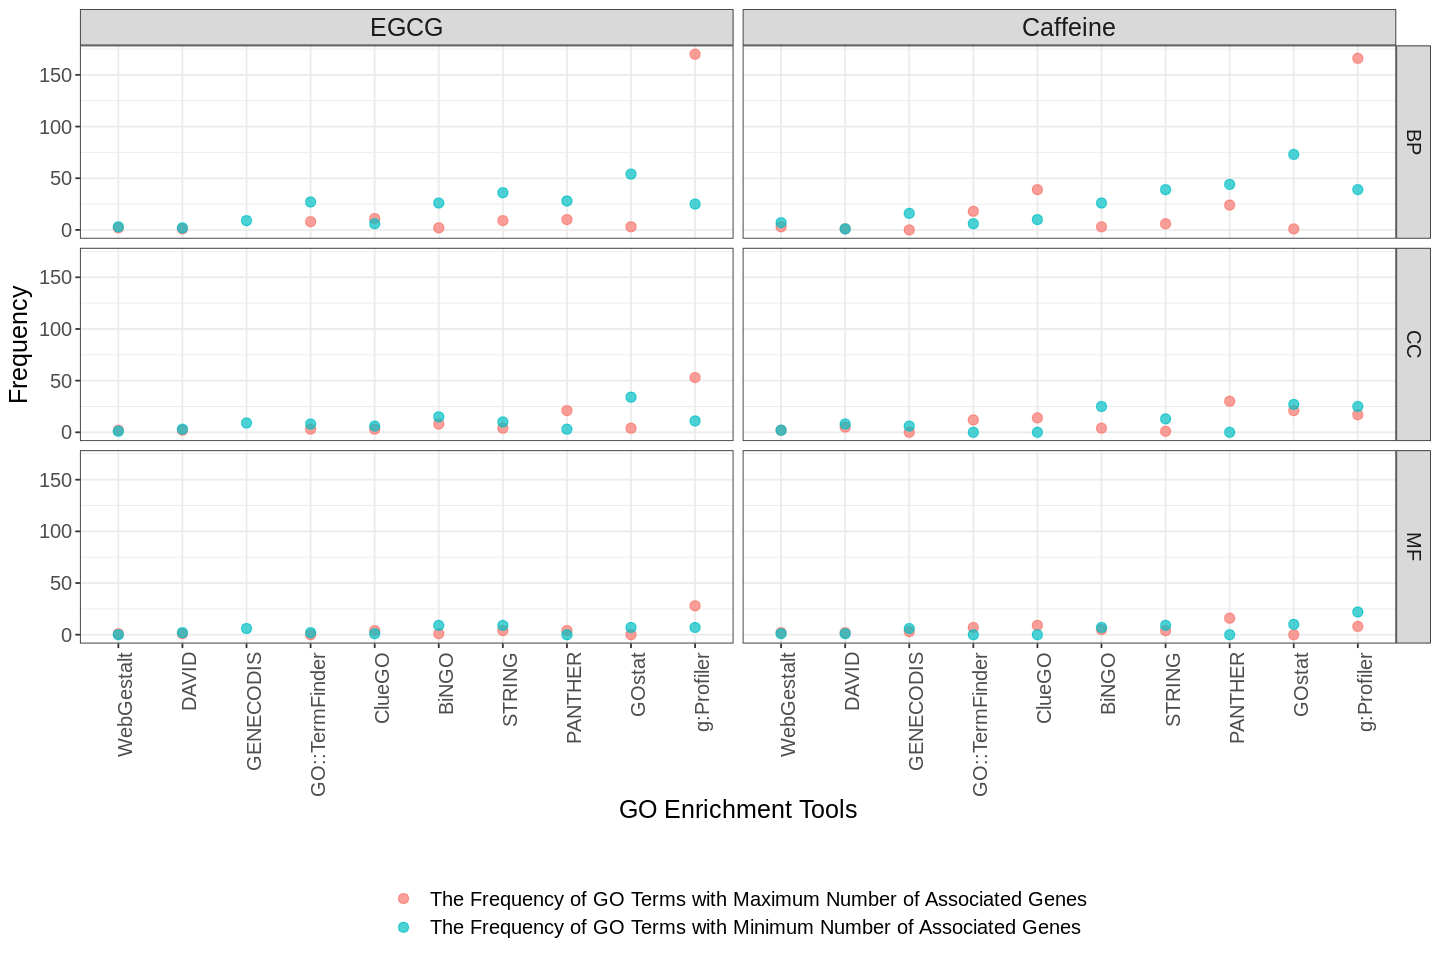

In [178]:

min_max.all <- rbind(min_max.EGCG,min_max.Caffeine)  %>% group_by(Var2,Var3,con) %>%
  mutate(my_ranks = order(order(Freq, decreasing=TRUE)))

min_max.all$con_02 <- ifelse(min_max.all$con == "Maximum",
                             "The Frequency of GO Terms with Maximum Number of Associated Genes",
                             "The Frequency of GO Terms with Minimum Number of Associated Genes")

ggplot(data=min_max.all, aes(x=reorder(Var1,Freq), y=Freq, color=con_02)) +
  geom_point(size = 2.5,alpha = 0.7) +
  theme_bw() +
  facet_grid(vars(Var3),vars(Var2)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(fill = "") +
  xlab("GO Enrichment Tools") +
  ylab("Frequency") +
  labs(color="") +
  theme(legend.position="bottom", legend.direction="vertical") + 
  theme(strip.text.x = element_text(size = 15))+
  theme(text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))



##Test Correlation

`geom_smooth()` using formula 'y ~ x'



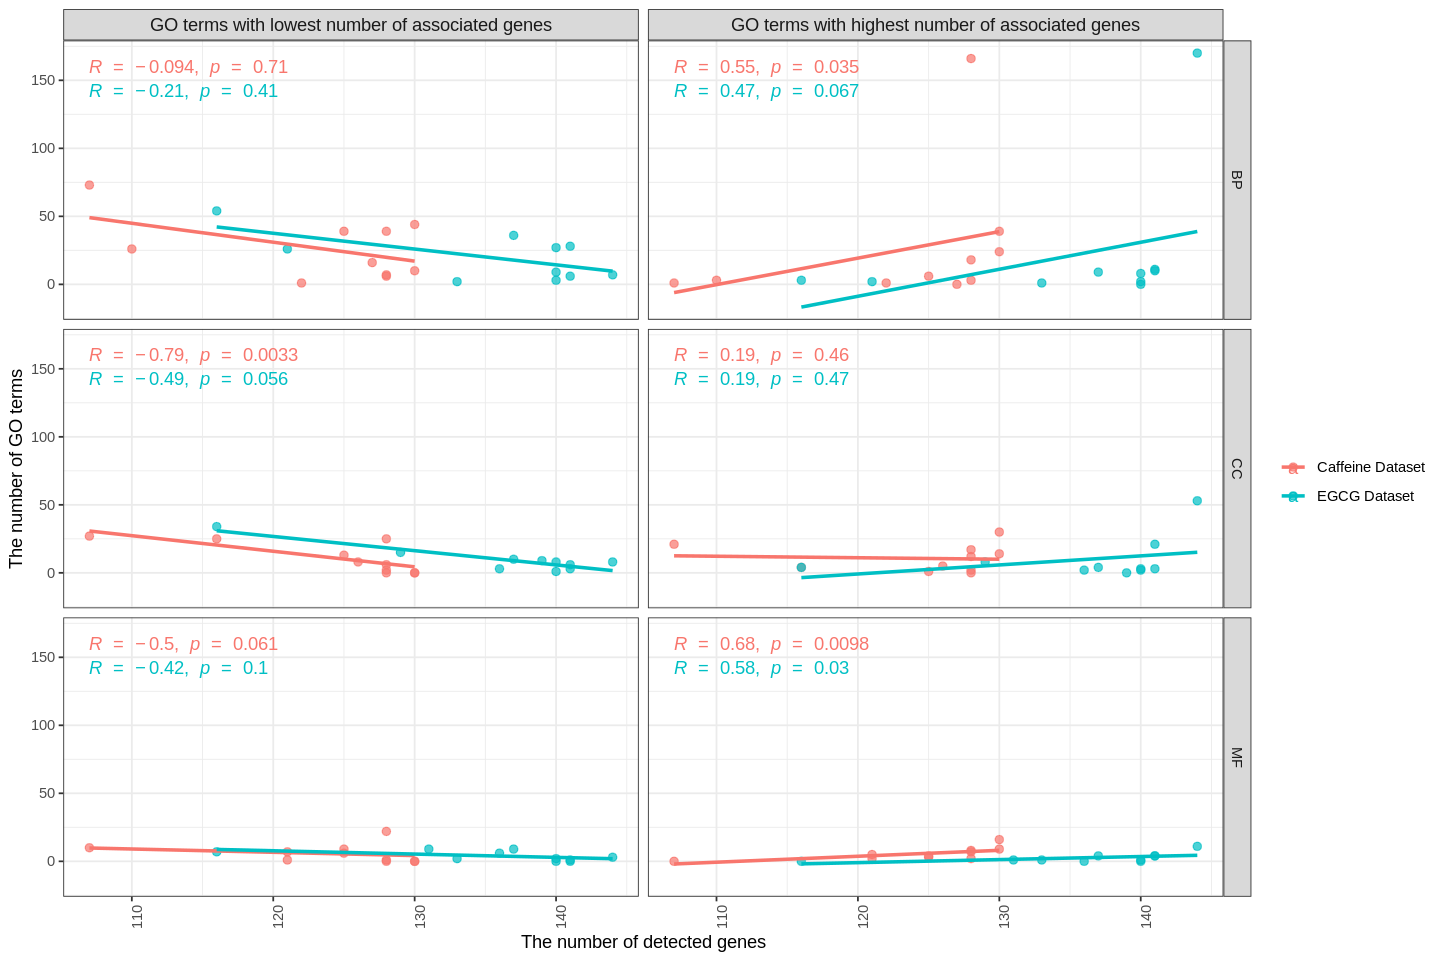

In [242]:

df <- fread("https://raw.githubusercontent.com/kittisaktaoma/GO-tools-comparsion/master/res/Correlation-GOterm-Input.txt") %>% melt(.,id.vars=c("dataset","Input","Tools","Type"))


ggplot(df,aes(x=Input,y=value, color=dataset)) +
  geom_point(size = 2,alpha = 0.7) +
  theme_bw() +
  facet_grid(vars(Type),vars(variable)) +
  stat_cor(method="kendall") +
  xlab("The number of detected genes") +
  ylab("The number of GO terms") +
  labs(color="") +
  geom_smooth(method='lm',se = FALSE) + 
  theme(strip.text.x = element_text(size = 11))+
  theme(text = element_text(size=11),
        axis.text.x = element_text(angle=90, hjust=1))



`summarise()` regrouping output by 'Database', 'Dataset' (override with `.groups` argument)



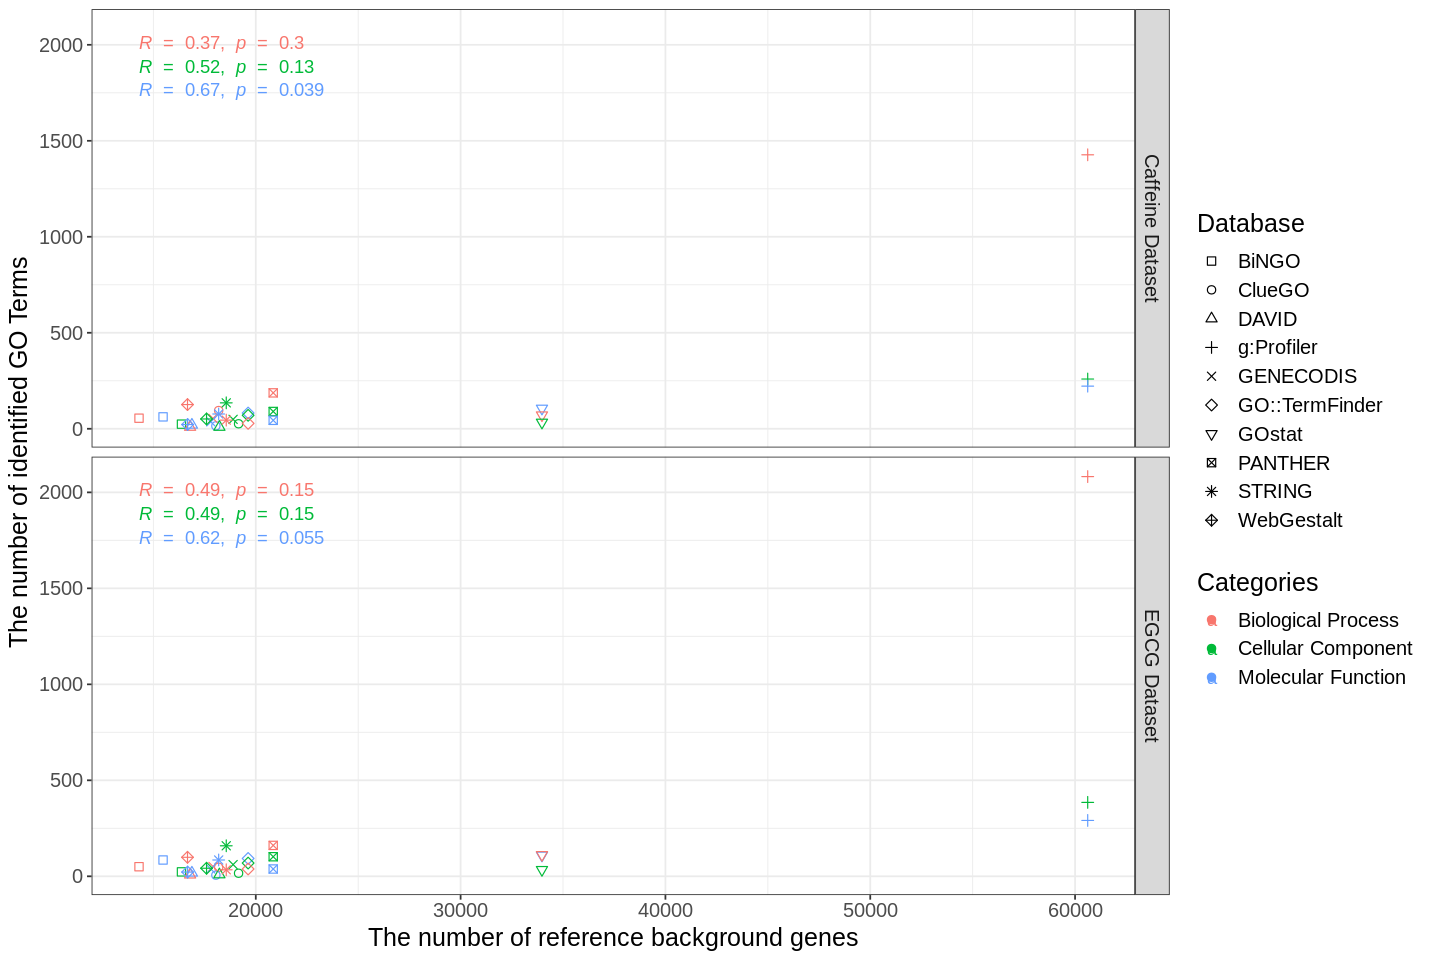

In [247]:
df <- fread("https://raw.githubusercontent.com/kittisaktaoma/GO-tools-comparsion/master/res/Reference-Count.txt") %>% as.data.frame()
df.01 <- df[with(df, order(Database,Dataset)), ]
df.all <- all[,-6] %>% unique() %>% group_by(Database,Dataset,Type) %>% 
  dplyr::summarise(CNT=n()) %>% as.data.frame() 
df.all.01 <- df.all[with(df.all, order(Database,Dataset)), ]



c.df <- cbind(df.01,df.all.01)[,-c(5,6,7)]


ggplot(c.df,aes(back,CNT,color=Categories)) +
  geom_point(aes(shape=Database),size=2) + 
  scale_shape_manual(values=seq(0,10)) +
  facet_grid(rows=vars(Dataset))  +
  theme_bw() +
  stat_cor(method="spearman") +
  xlab("The number of reference background genes") +
  ylab("The number of identified GO Terms")+ 
  theme(strip.text.x = element_text(size = 15))+
  theme(text = element_text(size=15))
